In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar
import plotly.graph_objects as go

In [30]:
def get_thermal_state(temperature):
    if temperature>=35.0 and temperature<37.3: 
        return "Normale","green"
    elif temperature>=37.3 and temperature<38.3: 
        return "Fièvre légère","orange"
    elif temperature>=38.3 and temperature<39.3: 
        return "Fièvre","yellow"
    elif  temperature>=39.3 and temperature<40.7:
        return "Forte fièvre","red"
    else :
        return "État thermique inconnu","black"

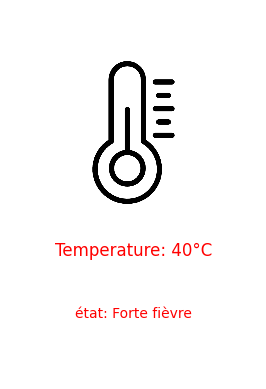

In [31]:
def visualize_temperature(temperature):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Load personalized thermometer icon
    thermometer_icon = plt.imread('thermometer.png')  # Replace with the path to your thermometer icon image file

    # Display thermometer icon using OffsetImage
    thermometer_imagebox = OffsetImage(thermometer_icon, zoom=0.2)
    thermometer_ab = AnnotationBbox(thermometer_imagebox, (0, 0), frameon=False)
    ax.add_artist(thermometer_ab)
    state,color=get_thermal_state(temperature)
    # Set the temperature value as text
    ax.text(0, -1, f'Temperature: {temperature}°C', ha='center', fontsize=12,color=color)

    

    # Display the temperature state phrase
    ax.text(0, -1.5, f'état: {state}', ha='center', fontsize=10,color=color)

    # Set axis limits and remove axes ticks
    ax.set_xlim(-1, 1)
    ax.set_ylim(-2, 1)
    ax.axis('off')

    # Show the plot
    plt.show()

# Example usage
body_temperature = 40  # Replace with the actual body temperature
visualize_temperature(body_temperature)


In [32]:

data=pd.read_csv('vital_signals.csv')
data['date'] = pd.to_datetime(data['date'])

In [33]:
def temperature_history():
    # Get today's date
    today_date = np.datetime64(datetime.now().date())
    # Filter data for the last two months
    last_two_months_data = data[data['date'] >= (today_date - np.timedelta64(60, 'D')).astype('datetime64[D]')]
    print(last_two_months_data)
    # Create a filled line plot using plotly
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=last_two_months_data['date'],
        y=last_two_months_data['temperature'],
        #fill='tozeroy',  # Filled area below the line
        mode='lines',
        line=dict(color='red', width=2),
        name='Temperature'
    ))

    # Add layout details
    fig.update_layout(
        title='Temperature des deux derniers mois ',
        xaxis=dict(title='Mois'),
        yaxis=dict(title='Temperature (°C)'),
        showlegend=True
    )

    # Show the plot
    fig.show()
temperature_history()

    temperature       date     month
87         40.3 2023-10-13   October
88         35.3 2023-10-16   October
89         38.7 2023-10-16   October
90         35.4 2023-10-22   October
91         35.7 2023-10-23   October
92         35.6 2023-10-24   October
93         36.0 2023-10-25   October
94         36.0 2023-10-29   October
95         35.3 2023-11-07  November
96         35.0 2023-11-10  November
97         40.3 2023-11-15  November
98         40.3 2023-11-19  November
99         35.2 2023-11-26  November


In [34]:
def heart_rate_history():
    # Get today's date
    today_date = np.datetime64(datetime.now().date())
    # Filter data for the last two months
    last_two_months_data = data[data['date'] >= (today_date - np.timedelta64(60, 'D')).astype('datetime64[D]')]
    print(last_two_months_data)
    # Create a filled line plot using plotly
    fig = go.Figure()

    # Create a bar chart trace
    fig.add_trace(go.Bar(
        x=last_two_months_data['date'],
        y=last_two_months_data['Fréquence cardiaque'],
        marker=dict(color='green'),  # Customize bar color
        name='Fréquence cardiaque'
    ))

    # Add layout details
    fig.update_layout(
        title='Fréquence cardiaque des deux derniers mois ',
        xaxis=dict(title='Mois'),
        yaxis=dict(title='Fréquence cardiaque (bpm)'),
        showlegend=True
    )

    # Show the plot
    fig.show()
heart_rate_history()

    temperature       date     month
87         40.3 2023-10-13   October
88         35.3 2023-10-16   October
89         38.7 2023-10-16   October
90         35.4 2023-10-22   October
91         35.7 2023-10-23   October
92         35.6 2023-10-24   October
93         36.0 2023-10-25   October
94         36.0 2023-10-29   October
95         35.3 2023-11-07  November
96         35.0 2023-11-10  November
97         40.3 2023-11-15  November
98         40.3 2023-11-19  November
99         35.2 2023-11-26  November


KeyError: 'Fréquence cardiaque'

In [ ]:
# Generate simulated heart rate values between 100 and 150 bpm
resp_rate = np.round(np.random.uniform(low=20, high=60, size=100))
resp_rate

array([57., 20., 33., 51., 27., 30., 48., 49., 37., 45., 44., 28., 23.,
       42., 31., 58., 22., 58., 41., 38., 35., 43., 23., 39., 38., 47.,
       24., 35., 42., 56., 21., 26., 43., 55., 46., 24., 33., 24., 51.,
       41., 57., 29., 40., 40., 48., 58., 24., 55., 36., 44., 50., 57.,
       58., 34., 45., 54., 25., 25., 22., 32., 57., 49., 59., 43., 28.,
       34., 48., 27., 51., 31., 38., 52., 45., 40., 36., 51., 56., 33.,
       39., 46., 28., 30., 32., 34., 30., 33., 54., 56., 33., 37., 25.,
       57., 56., 30., 27., 31., 40., 53., 40., 43.])

In [ ]:
data['temperature']=resp_rate

In [ ]:
"""positions_list = ["Debout", "Assis", "En sommeil", "Agitation ou réveil", "Sur le Ventre", "Sur le Dos", "Incliné à Gauche", "Incliné à Droite", "Saut", "Balancement", "Mouvement Inattendu"]
positions = np.random.choice(positions_list, size=100)"""

In [ ]:
#data['Positions']=positions

In [ ]:
data = data.rename(columns={'temperature':'Freq_resp'})
data

,Freq_resp,date,month
0,57.0,2022-12-04,December
1,20.0,2022-12-15,December
2,33.0,2022-12-30,December
3,51.0,2022-12-31,December
4,27.0,2023-01-07,January
...,...,...,...
95,31.0,2023-11-07,November
96,40.0,2023-11-10,November
97,53.0,2023-11-15,November
98,40.0,2023-11-19,November


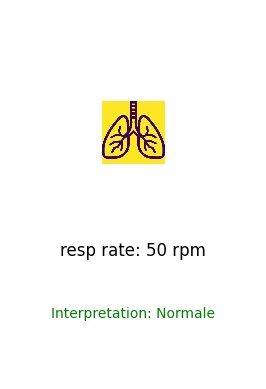

In [ ]:
def heart_rate_history(resp_rate, age):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the aspect ratio to be equal
    ax.set_aspect('equal', adjustable='box')

    # Load personalized heart rate icon
    resp_rate_icon = plt.imread('resp_rate_icon.png')  # Replace with the path to your heart rate icon image file

    # Display heart rate icon using OffsetImage
    resp_rate_imagebox = OffsetImage(resp_rate_icon, zoom=0.1)
    resp_rate_ab = AnnotationBbox(resp_rate_imagebox, (0, 0), frameon=False)
    ax.add_artist(resp_rate_ab)

    # Set the heart rate value as text
    ax.text(0, -1, f'resp rate: {resp_rate} rpm', ha='center', fontsize=12)

    # Display the interpretation
    if (30<= resp_rate <= 60) and ( age >= 0 and age < 6) :
        interpretation = "Normale"
        color = 'green'
    elif (25<= resp_rate <= 40) and (age >= 6 and age < 12):
        interpretation = "Normale"
        color = 'green'
    elif (20<= resp_rate <= 30) and (age >= 12 and age < 60):
        interpretation = "Normale"
        color = 'green'
    else:
        interpretation = "Anormal"
        color = 'red'

    ax.text(0, -1.5, f'Interpretation: {interpretation}', ha='center', fontsize=10, color=color)

    # Set axis limits and remove axes ticks
    ax.set_xlim(-1, 1)
    ax.set_ylim(-2, 1)
    ax.axis('off')

    # Show the plot
    plt.show()

# Example usage
resting_heart_rate = 50  # Replace with the actual resting heart rate
age = 5 #The age in months
heart_rate_history(resting_heart_rate, age)

In [ ]:
def Freq_resp_history():
    # Get today's date
    today_date = np.datetime64(datetime.now().date())
    # Filter data for the last two months
    last_two_months_data = data[data['date'] >= (today_date - np.timedelta64(60, 'D')).astype('datetime64[D]')]
    print(last_two_months_data)
    # Create a filled line plot using plotly
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=last_two_months_data['date'],
        y=last_two_months_data['Freq_resp'],
        #fill='tozeroy',  # Filled area below the line
        mode='lines',
        line=dict(color='red', width=2),
        name='Freq_resp'
    ))

    # Add layout details
    fig.update_layout(
        title='Fréquence respiratoire des deux derniers mois ',
        xaxis=dict(title='Mois'),
        yaxis=dict(title='Fréquence respiratoire" (rpm)'),
        showlegend=True
    )

    # Show the plot
    fig.show()
Freq_resp_history()

    Freq_resp       date     month
87       56.0 2023-10-13   October
88       33.0 2023-10-16   October
89       37.0 2023-10-16   October
90       25.0 2023-10-22   October
91       57.0 2023-10-23   October
92       56.0 2023-10-24   October
93       30.0 2023-10-25   October
94       27.0 2023-10-29   October
95       31.0 2023-11-07  November
96       40.0 2023-11-10  November
97       53.0 2023-11-15  November
98       40.0 2023-11-19  November
99       43.0 2023-11-26  November
